# Simpel lineær regression

Den primære maskinlæringsalgoritme til SOP.

**Importerering og konfiguration af biblioteker**

In [200]:
#Importerer biblioteker
%matplotlib inline
import time
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
pd.set_option('precision', 3) # Indstiller antallet af decimaler.

# Indstillinger af design for grafer
sns.set_palette('husl')
sns.set_style("darkgrid")

**Importering af datasæt**

In [178]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" # URL/link til datasæt
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] #Omdøber kolonner
dataset = pd.read_csv(url, names=columns) # Importerer datasættet

**Undersøgelse af data**

In [179]:
dataset.shape # Dimensionerne af datasættet.

(150, 5)

In [180]:
dataset.head(10) # Viser de 10 første observationer i datasættet.

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [181]:
dataset.tail(10) # Viser de 10 sidste observationer i datasættet.

,sepal-length,sepal-width,petal-length,petal-width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [182]:
dataset.describe() # Statistisk beskrivelse af datasættet.

,sepal-length,sepal-width,petal-length,petal-width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


**Sammenligner variabler med scatterplot-matrix**

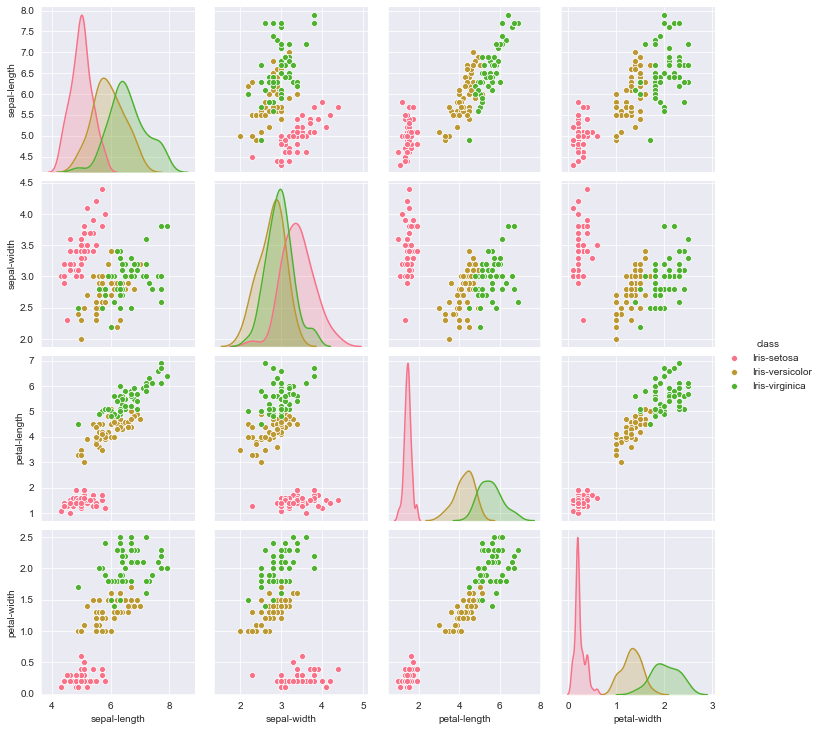

In [183]:
sns.pairplot(dataset, hue='class') #Matriksen. "hue" farver datapunkter afhængig af klassen.
plt.show() # Viser grafen.

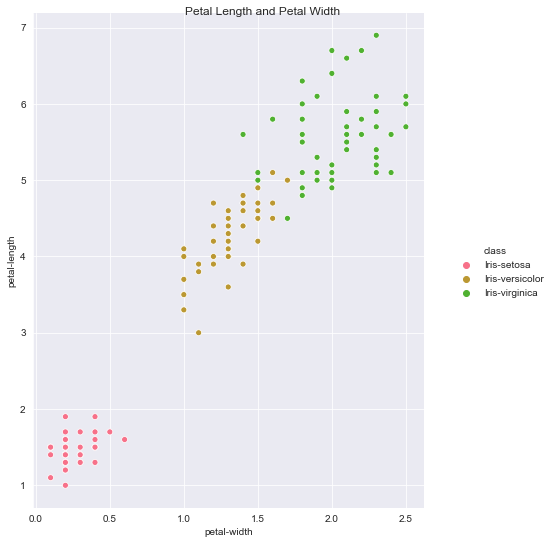

In [184]:
g = sns.relplot(x="petal-width", y="petal-length", hue="class", data=dataset) # plotter petal-width og petal-length.
g.fig.suptitle("Petal Length and Petal Width") # Giver grafen en titel.
g.fig.set_size_inches(8,8) # Størrelsen af grafen i tommer.
plt.show() # Viser grafen.

**Tjekker den gennemsnitlige længde og bredde af kronblad**

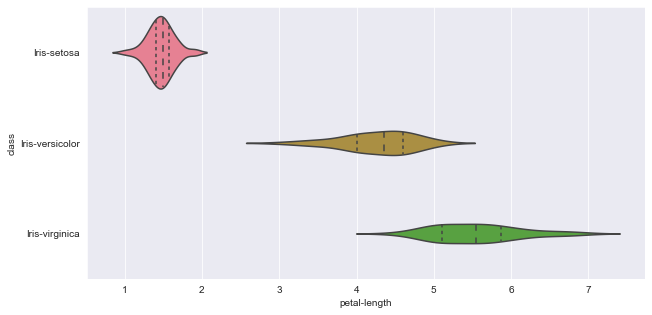

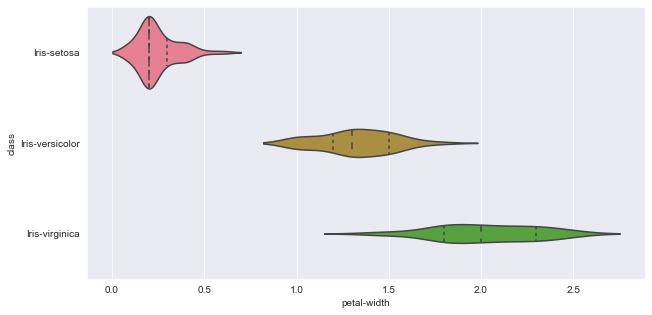

In [185]:
plt.figure(figsize=(10,5))
sns.violinplot(x='petal-length', y='class', data=dataset, inner='quartile') #Violinplot for petal-length.
plt.show() # Viser dplottet.
plt.figure(figsize=(10,5))
sns.violinplot(x='petal-width', y='class', data=dataset, inner='quartile') #Violinplot for petal-width.
plt.show() # Viser plottet.

**Omformer værdier for X og y til enkel dimension**

In [186]:
#Omformer dem, så de har samme form, således de er kompatible sammen.
X = dataset['petal-width'].values.reshape(-1,1) # 1 kolonne med ukendte rækker.
y = dataset['petal-length'].values.reshape(-1,1) # 1 kolonne med ukendte rækker.

**Splitter datasæt med trænings- og testdata**

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [188]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 1) (30, 1) (120, 1) (30, 1)


**Initierer lineær regression og træner/fitter vores træningsdata**

In [189]:
start_time = time.time() # Starter tidstagning.
regressor = LinearRegression() # Instantiering af lineær regression.
regressor.fit(X_train, y_train) # Træning af algoritme.
print(time.time() - start_time, "sekunder") # Slutter tidstagning og printer resultatet.

0.0007772445678710938 sekunder


**Printer de bedste A- og B-værdier (intercept & slope)**

In [201]:
#Hældning (A)
print("a: ", regressor.coef_)

#Skæringspunkt med y-aksen (B)
print("b: ", regressor.intercept_)

a:  [[2.22534146]]
b:  [1.07680888]


**Anvender test-data til at forudsige, hvor nøjagtig vores algoritme forudsiger procentvist**

In [191]:
y_pred = regressor.predict(X_test) # Funktion til forudsigelse

**Sammenligner X_test med forudsagte værdier**

In [192]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # Aktuel data vs forudsagt data
df

,Actual,Predicted
0,5.1,6.418
1,4.0,3.302
2,1.4,1.522
3,6.3,5.082
4,1.5,1.522
5,6.0,6.640
6,1.3,1.744
7,4.7,4.415
8,4.8,4.192
9,4.0,3.970


**Visualisering af sammenligning mellem aktuelle og forudsete værdier**

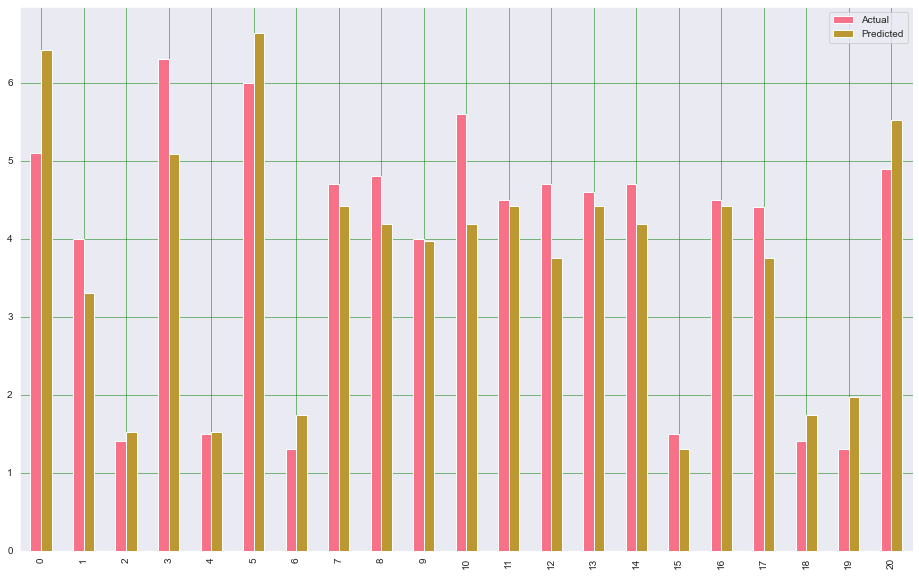

In [193]:
df1 = df.head(21) #Dataramme for sammenligningen
df1.plot(kind='bar', figsize=(16,10)) # Størrelsen af graferne og typen
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green') # Konfiguration af gitter
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') # Konfiguration af gitter
plt.show() # Viser plottet

**Plotter vores regressionslinje samt testdata**

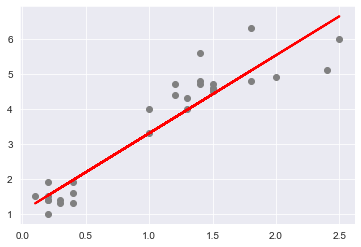

In [194]:
plt.scatter(X_test, y_test, color='gray') #Scatterplot af alle datapunkterne for testdata
plt.plot(X_test, y_pred, color='red', linewidth=2) # regresionslinjen
plt.show() # Viser plottet 

**Beregner fejl (MAE, MSE, RMSE, R2)**

In [197]:
print('Correlation of Error: ', metrics.r2_score(y_test, y_pred)) # Printer R2-score (korrelationskoefficient)
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred)) # Printer MSE

Correlation of Error:  0.8772111981020695
Mean Squared Error:  0.3388275129172126
